In [ ]:
# Visualization of original reference data and spatial proteomics data.
# 20241219

In [25]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib as mat
import os
import sys
from scipy import stats
import warnings
import cell2location

warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 10
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [ ]:
# set the working directory
os.chdir("Spatial_DC_V1/")
dataset_dir = "datasets/mouse_PDAC/"

         Falling back to preprocessing with `sc.pp.pca` and default params.


2024-12-19 16:29:27.543410: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-19 16:29:27.596538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-19 16:29:28.322150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


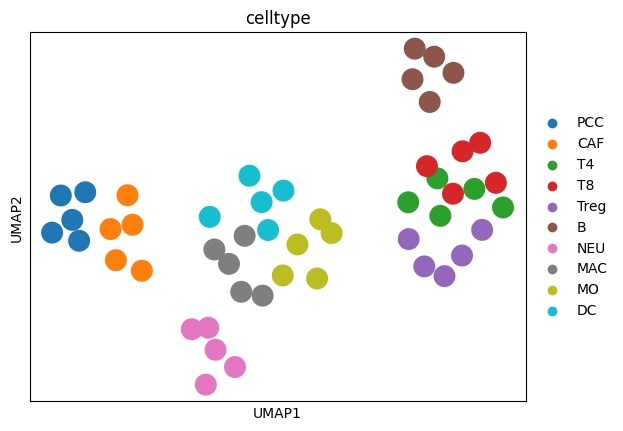

In [2]:
# Visualization of reference data
sc_adata = sc.read_h5ad(f"{dataset_dir}/original_reference_proteomics.h5ad")

ct_order = ['PCC', 'CAF', 'T4', 'T8', 'Treg', 'B', 
       'NEU', 'MAC', 'MO', 'DC']
sc_adata.obs["celltype"] = sc_adata.obs["celltype"].astype("category")
sc_adata.obs["celltype"] = sc_adata.obs["celltype"].cat.set_categories(ct_order,ordered=False)

# vis with UMAP
sc.pp.normalize_total(sc_adata)
sc.pp.log1p(sc_adata)

sc.pp.neighbors(sc_adata, n_pcs=20, n_neighbors=10)
sc.tl.umap(sc_adata)

sc.pl.umap(sc_adata, color=["celltype"], size=1000)


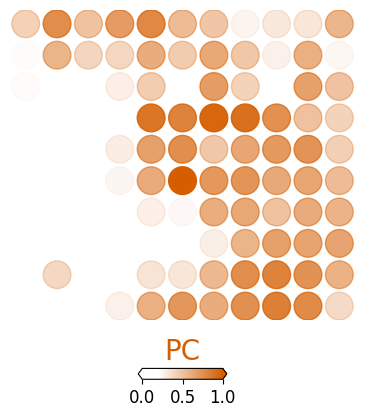

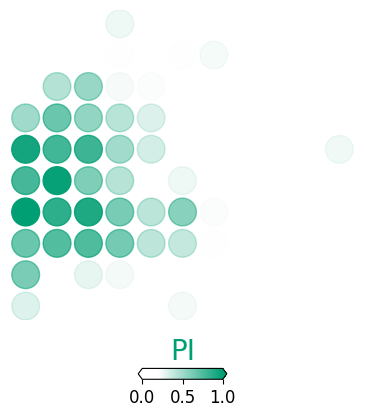

In [23]:
# Visualization of ground truth distribution for PC and PI
sp_adata = sc.read_h5ad(f"{dataset_dir}/original_spatial_proteomics.h5ad")
gd_df = pd.read_csv(f"{dataset_dir}/mIHC_intensity.csv",index_col=0,sep="\t")
sp_adata.obs = gd_df

# show the distribution of PC and PI
PC_plt = cell2location.plt.plot_spatial(sp_adata,show_img=False,labels=["PC"],color=["PC"],circle_diameter=20.0,reorder_cmap=[1],max_color_quantile=1)
PI_plt = cell2location.plt.plot_spatial(sp_adata,show_img=False,labels=["PI"],color=["PI"],circle_diameter=20.0,reorder_cmap=[3],max_color_quantile=1)